# Exercise 6

Name and student id: Andrey Verbovskiy 1910028

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose, Dense

## Exercise 6.1: Convnet encoder-decoder for MNIST (3p)

Change the fully connected autoencoder in tapaaminen6examples into a convnet-based one, ie. use Conv2D and MaxPooling2D layers in encoder and Conv2D and UpSampling2D layers in decoder. Compare the results (visually) to fully connected autoencoder results and write briefly your findings.

In [156]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.reshape(-1,28,28,1).astype('float32') / 255.0
x_test = x_test.reshape(-1,28,28,1).astype('float32') / 255.0

y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)

print(x_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000,)


In [150]:
target_dim = 30
encoder = keras.models.Sequential()

encoder.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=True, padding='valid', input_shape=(28, 28, 1,), activation='relu'))
encoder.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
encoder.add(Conv2D(filters=6, kernel_size=5, strides=1, use_bias=False, padding='valid', activation='relu'))
encoder.add(MaxPooling2D(pool_size=(2,2), padding='valid'))
encoder.add(Conv2D(target_dim, kernel_size=5,strides=1, activation='relu', padding='same'))


encoder.summary()

decoder = keras.models.Sequential()

decoder.add(Conv2D(filters=6, kernel_size=2, strides=1, use_bias=True, padding='valid', input_shape=(4,4,30,), activation='relu'))
decoder.add(UpSampling2D(size=(2, 2)))
decoder.add(Conv2D(filters=6, kernel_size=2, strides=1, use_bias=False, padding='valid', activation='relu'))
decoder.add(Conv2D(filters=6, kernel_size=1,strides=3, activation='relu', padding='same'))
decoder.add(Conv2DTranspose(64, 3, activation="relu", strides=7, padding="same"))
decoder.add(Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same"))
decoder.add(Conv2DTranspose(1, 3, activation="sigmoid", padding="same"))

# Dear Peter, is there any other way to make output of decoder to be in shape (28,28,1), other than using transpose and 
#changing strides value to multiply the numbers?
decoder.summary()


encdec = keras.models.Sequential()
encdec.add(encoder)
encdec.add(decoder)
encdec.compile(optimizer='Adam', loss='mse')
encdec.summary()

Model: "sequential_176"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_467 (Conv2D)          (None, 24, 24, 6)         156       
_________________________________________________________________
max_pooling2d_192 (MaxPoolin (None, 12, 12, 6)         0         
_________________________________________________________________
conv2d_468 (Conv2D)          (None, 8, 8, 6)           900       
_________________________________________________________________
max_pooling2d_193 (MaxPoolin (None, 4, 4, 6)           0         
_________________________________________________________________
conv2d_469 (Conv2D)          (None, 4, 4, 30)          4530      
Total params: 5,586
Trainable params: 5,586
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_177"
_________________________________________________________________
Layer (type)              

In [151]:
hist = encdec.fit(x_train,x_train, epochs=15, batch_size=64)

Epoch 1/15
938/938 [==============================] - 19s 21ms/step - loss: 0.0774
Epoch 2/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0667
Epoch 3/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0656
Epoch 4/15
938/938 [==============================] - 22s 24ms/step - loss: 0.0648
Epoch 5/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0621
Epoch 6/15
938/938 [==============================] - 20s 21ms/step - loss: 0.0608
Epoch 7/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0603
Epoch 8/15
938/938 [==============================] - 20s 22ms/step - loss: 0.0599
Epoch 9/15
938/938 [==============================] - 20s 22ms/step - loss: 0.0597
Epoch 10/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0594
Epoch 11/15
938/938 [==============================] - 21s 22ms/step - loss: 0.0593
Epoch 12/15
938/938 [==============================] - 21s 23ms/step - loss: 0.0591
E

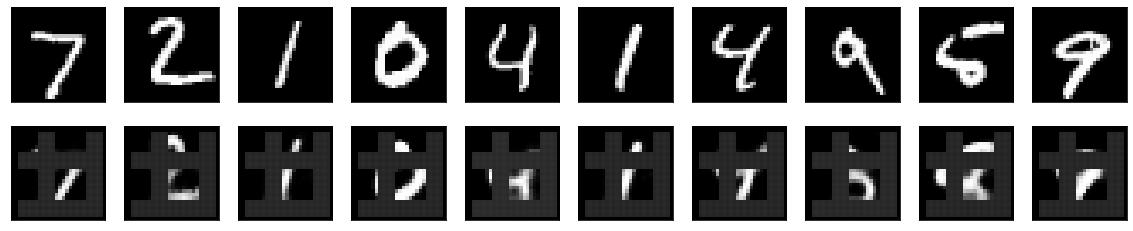

In [168]:
x_test_ed = encdec.predict(x_test)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_ed[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

Judging from the picture, the same pixels are getting discarded in every single frame, which means that I deliberately discard some data. There is definitely an issue in my code. Maybe, the reason is conv2d_transpose, that I used in decoder. Or it could be because I did not use the functional API? All the visible parts seem to be approximately accurate. Maybe flattening and using final dense layer would make adiiference, yet as the assignment states I have to use only conv layers.

## Exercise 6.2: Imbd review sentiment analysis improvement (3p)

Improve the sentiment analyser in session6examples. You might use different RNN layer (like LSTM), stack two layers, try to manage overfitting etc. Check the code examples in Keras documentation for how to handle for example LSTM layer.

In [169]:
from tensorflow.keras.datasets import imdb 

vocabulary_size = 15000
max_seq_len = 150

(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=vocabulary_size)

17465344/17464789 [==============================] - 2s 0us/step


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\averb\anaconda3\envs\tf\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecat

In [170]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

index_dict = imdb.get_word_index()
word_dict = dict([(value, key) for (key, value) in index_dict.items()])

# 0 - padding word, 1 - start word, 2 - out of vocabulary word (so do .get(i-3) from the reverse dictionary))
print(" ".join([word_dict.get(i-3, "#") for i in x_train[8]]))

# join the train and val sets and split with 80/20 ratio
data = np.concatenate((x_train, x_val), axis=0)
targets = np.concatenate((y_train, y_val), axis=0)

data_train, data_val, targets_train, targets_val = train_test_split(data, targets, test_size=0.2)

(25000,) (25000,) (25000,) (25000,)
1646592/1641221 [==============================] - 0s 0us/step
# just got out and cannot believe what a brilliant documentary this is rarely do you walk out of a movie theater in such awe and # lately movies have become so over hyped that the thrill of discovering something truly special and unique rarely happens # # did this to me when it first came out and this movie is doing to me now i didn't know a thing about this before going into it and what a surprise if you hear the concept you might get the feeling that this is one of those # movies about an amazing triumph covered with over the top music and trying to have us fully convinced of what a great story it is telling but then not letting us in # this is not that movie the people tell the story this does such a good job of capturing every moment of their involvement while we enter their world and feel every second with them there is so much beyond the climb that makes everything they go through s

In [172]:
data_train = keras.preprocessing.sequence.pad_sequences(data_train, maxlen=max_seq_len)
data_val = keras.preprocessing.sequence.pad_sequences(data_val, maxlen=max_seq_len)

print(data_val.shape)

(10000, 150)


In [184]:
embedded_dimension = 40
training = True

# layers defined in Keras functional API style

inputs = keras.Input(shape=(max_seq_len,))

embedding = keras.layers.Embedding(vocabulary_size, embedded_dimension, input_length=max_seq_len)

rnn = keras.layers.LSTM(16, return_state=True, dropout=0.1)

output = keras.layers.Dense(1, activation='sigmoid', kernel_regularizer=keras.regularizers.l2(0.01))

# the computations
x1 = embedding(inputs)
_,_, x2 = rnn(x1, training=training) # extract final state from simple rnn, ignore sequence output
outputs = output(x2)

# model in created by specifying inputs and outputs
model = keras.Model(inputs=inputs, outputs=outputs, name="imdb_classication_model")

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
model.summary()

Model: "imdb_classication_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_48 (InputLayer)        [(None, 150)]             0         
_________________________________________________________________
embedding_8 (Embedding)      (None, 150, 40)           600000    
_________________________________________________________________
lstm_8 (LSTM)                [(None, 16), (None, 16),  3648      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 17        
Total params: 603,665
Trainable params: 603,665
Non-trainable params: 0
_________________________________________________________________


In [185]:
hist = model.fit(data_train, targets_train, epochs=8, batch_size=32, validation_data=(data_val, targets_val))

Epoch 1/8
1250/1250 [==============================] - 23s 18ms/step - loss: 0.3741 - acc: 0.8409 - val_loss: 0.3180 - val_acc: 0.8740
Epoch 2/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2707 - acc: 0.8968 - val_loss: 0.3351 - val_acc: 0.8612
Epoch 3/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2457 - acc: 0.9071 - val_loss: 0.3111 - val_acc: 0.8726
Epoch 4/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2265 - acc: 0.9153 - val_loss: 0.2837 - val_acc: 0.8861
Epoch 5/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2118 - acc: 0.9197 - val_loss: 0.2918 - val_acc: 0.8830
Epoch 6/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.2021 - acc: 0.9236 - val_loss: 0.2904 - val_acc: 0.8871
Epoch 7/8
1250/1250 [==============================] - 22s 18ms/step - loss: 0.1932 - acc: 0.9270 - val_loss: 0.2861 - val_acc: 0.8860
Epoch 8/8
1250/1250 [==============================] - 

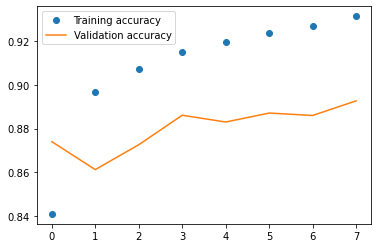

In [186]:
plt.plot(hist.history['acc'], 'o', label='Training accuracy')
plt.plot(hist.history['val_acc'], label='Validation accuracy')
plt.legend()
plt.show()

## Extra exercise 6.3: Translation (3p)

Study the tutorial at https://www.tensorflow.org/tutorials/text/nmt_with_attention and adapt it for Eng-Fin translation. Report your findings on training the model, and on the quality of the translation (subjectively). (Note: you might need to clean the Eng-Fin translation file).